Segments: 3
IS OOS Ratio: 4
OOS months: 3
IS Months: 12
Months to load: 39
Data Load Date:  2016-06-02
In Sample Start  Date:  2016-07-02
Out of Sample Start Date:  2017-07-02
Pivot Date:  2018-04-02
Successfully retrieved data series for tlt



IN SAMPLE

====== ADF Test for Stationarity ======
Issue:  tlt
Start Date:  2016-07-05
End Date:  2017-06-30

ADF Statistic: -1.920498
p-value: 0.322480
** The series is likely non-stationary **
Critical Values:
	1%: -3.457
	5%: -2.873
	10%: -2.573

====== Hurst Exponent Test ======
Hurst(GBM):   0.500
Hurst(MR):    0.001
Hurst(TR):    0.915
Hurst(tlt):   0.481


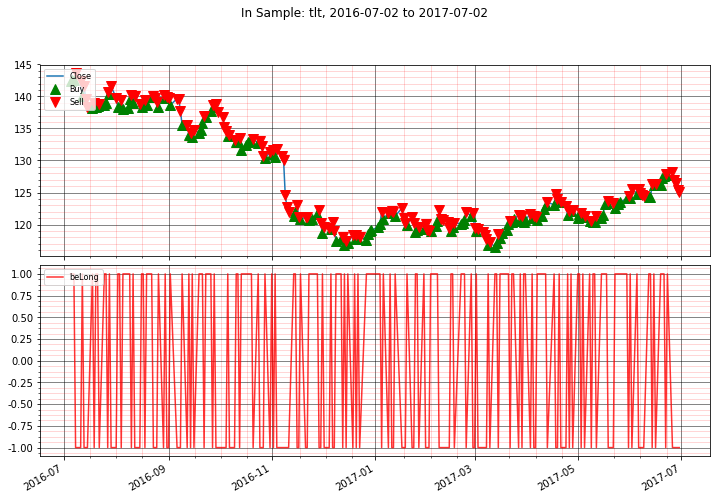

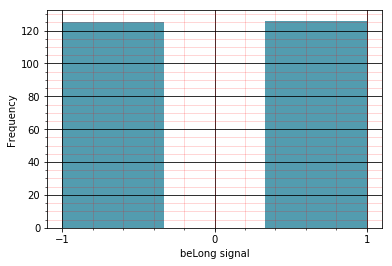




OUT OF SAMPLE

====== ADF Test for Stationarity ======
Issue:  tlt
Start Date:  2017-07-03
End Date:  2017-10-02

ADF Statistic: -1.843353
p-value: 0.359160
** The series is likely non-stationary **
Critical Values:
	1%: -3.539
	5%: -2.909
	10%: -2.592

====== Hurst Exponent Test ======
Hurst(GBM):   0.494
Hurst(MR):    0.000
Hurst(TR):    0.908
Hurst(tlt):   0.323


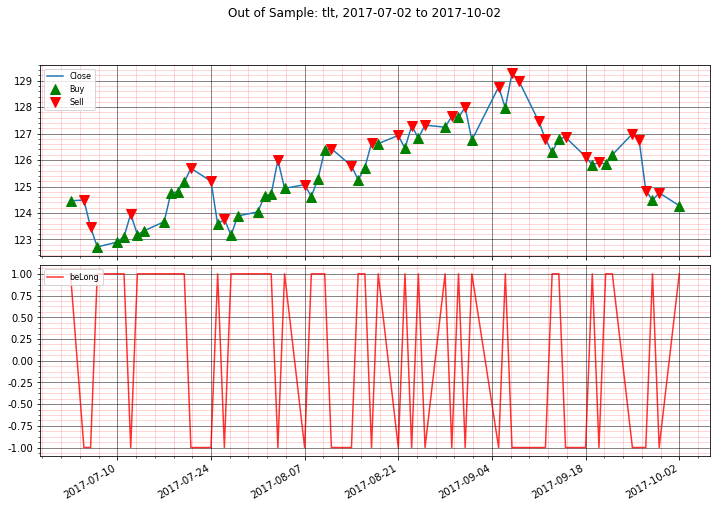

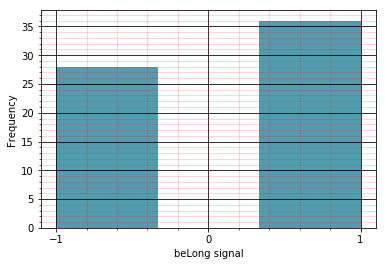




IN SAMPLE

====== ADF Test for Stationarity ======
Issue:  tlt
Start Date:  2016-10-03
End Date:  2017-10-02

ADF Statistic: -3.161525
p-value: 0.022323
** The series is likely stationary **
Critical Values:
	1%: -3.457
	5%: -2.873
	10%: -2.573

====== Hurst Exponent Test ======
Hurst(GBM):   0.499
Hurst(MR):    -0.001
Hurst(TR):    0.913
Hurst(tlt):   0.525


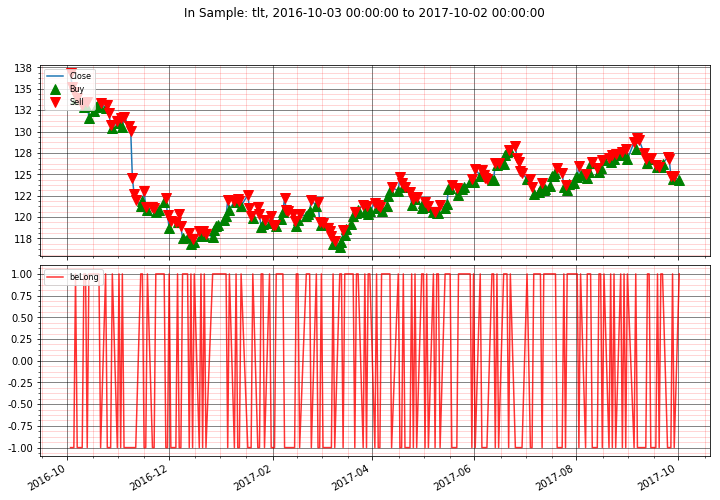

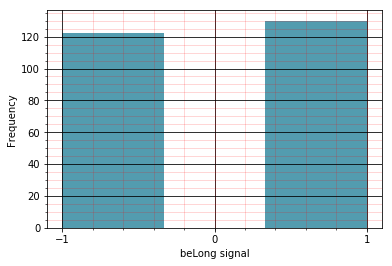




OUT OF SAMPLE

====== ADF Test for Stationarity ======
Issue:  tlt
Start Date:  2017-10-03
End Date:  2017-12-29

ADF Statistic: -2.686747
p-value: 0.076360
** The series is likely non-stationary **
Critical Values:
	1%: -3.544
	5%: -2.911
	10%: -2.593

====== Hurst Exponent Test ======
Hurst(GBM):   0.502
Hurst(MR):    0.001
Hurst(TR):    0.910
Hurst(tlt):   0.033


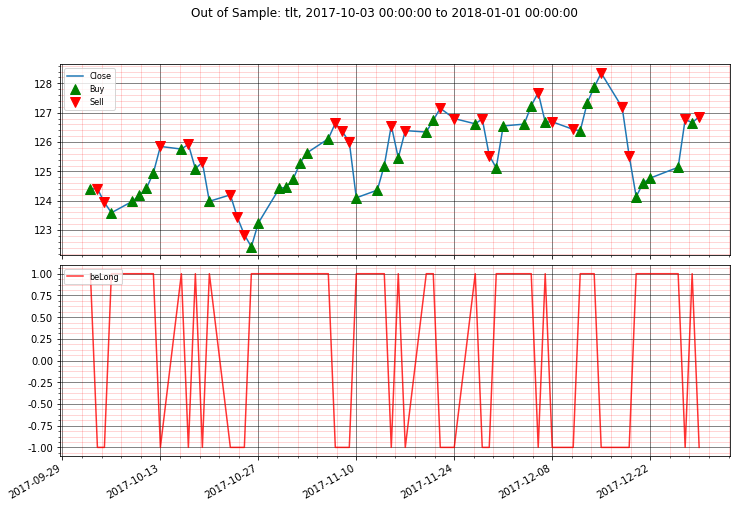

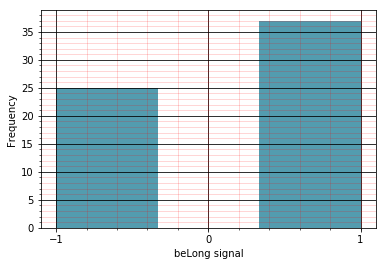




IN SAMPLE

====== ADF Test for Stationarity ======
Issue:  tlt
Start Date:  2017-01-04
End Date:  2018-01-03

ADF Statistic: -2.300264
p-value: 0.171883
** The series is likely non-stationary **
Critical Values:
	1%: -3.457
	5%: -2.873
	10%: -2.573

====== Hurst Exponent Test ======
Hurst(GBM):   0.499
Hurst(MR):    0.000
Hurst(TR):    0.916
Hurst(tlt):   0.334


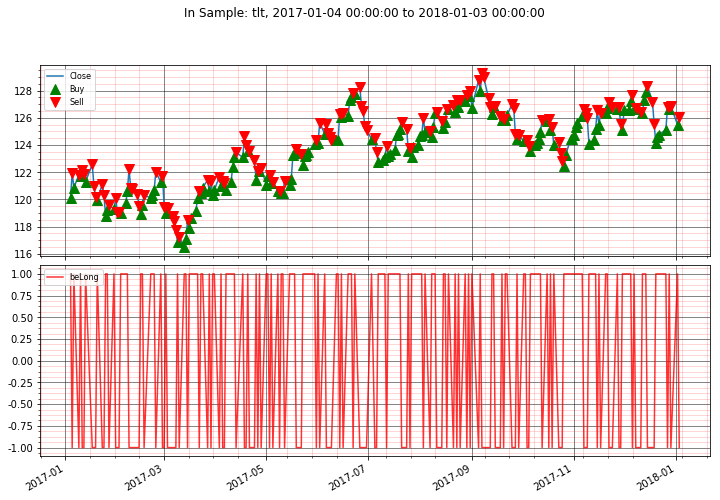

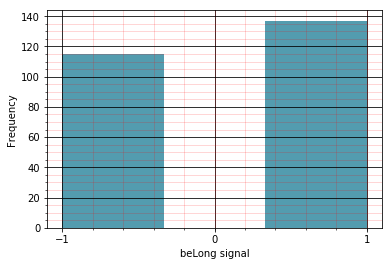




OUT OF SAMPLE

====== ADF Test for Stationarity ======
Issue:  tlt
Start Date:  2018-01-02
End Date:  2018-03-29

ADF Statistic: -1.761104
p-value: 0.399936
** The series is likely non-stationary **
Critical Values:
	1%: -3.544
	5%: -2.911
	10%: -2.593

====== Hurst Exponent Test ======
Hurst(GBM):   0.498
Hurst(MR):    0.000
Hurst(TR):    0.910
Hurst(tlt):   0.555


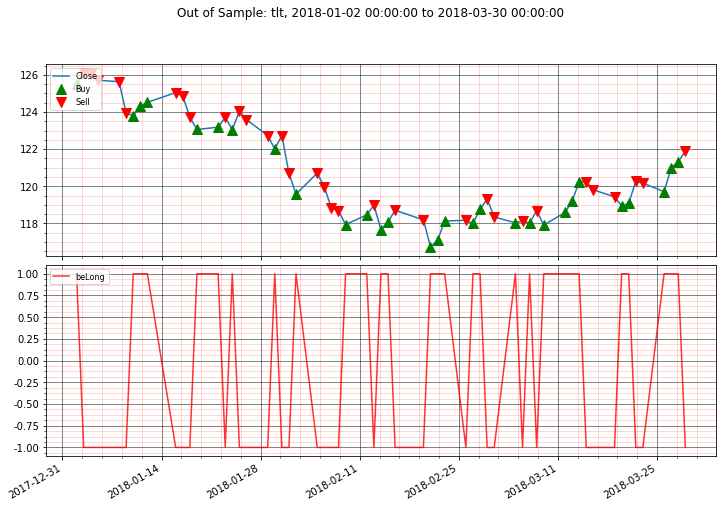

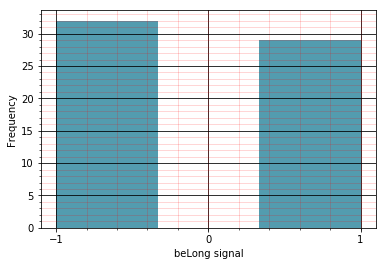

In [9]:
# -*- coding: utf-8 -*-
"""
Created on Sat May 26 10:19:51 2018

@author: kruegkj

time_test_modelling.py
Goal: Test and verify in sample and out of sample time splits for dataset
"""
from Code.lib.plot_utils import PlotUtility
from Code.lib.time_utils import TimeUtility
from Code.lib.retrieve_data import DataRetrieve, ComputeTarget
from Code.utilities.stat_tests import adf_test, hurst_setup

import datetime
from dateutil.relativedelta import relativedelta
from pandas.tseries.offsets import BDay
import matplotlib.pylab as plt


if __name__ == "__main__":
    plotIt = PlotUtility()
    timeUtil = TimeUtility()
    dSet = DataRetrieve()
    ct = ComputeTarget()
    
    issue = "tlt" 
    pivotDate = datetime.date(2018, 4, 2)
    is_oos_ratio = 4
    oos_months = 3
    segments = 3
    
    # get segmented dates
    isOosDates = timeUtil.is_oos_data_split(issue, pivotDate, is_oos_ratio, oos_months, segments)
    dataLoadStartDate = isOosDates[0]
    is_start_date = isOosDates[1]
    oos_start_date = isOosDates[2]
    is_months = isOosDates[3]  
    is_end_date = isOosDates[4]
    oos_end_date = isOosDates[5]
    
    #load data
    dataSet = dSet.read_issue_data(issue)   
    dataSet = dSet.set_date_range(dataSet, dataLoadStartDate, pivotDate)
    
    #set beLong level
    beLongThreshold = 0.0
    dataSet = ct.setTarget(dataSet, "Long", beLongThreshold)
    
    def stationarity_tests(s_df, issue):
        print("=============================================================")
        adf_test(s_df, issue)
        hurst_setup(s_df['Close'][:], issue)
        print("========================================")
    
    for i in range(segments):
        modelData = dSet.set_date_range(dataSet,
                                        is_start_date,
                                        is_end_date
                                        )
        print ("\n\n\nIN SAMPLE")
        # Stationarity tests
        stationarity_tests(modelData, issue)
        #print_beLongs(modelData)
        plotIt.plot_beLongs("In Sample",
                            issue,
                            modelData,
                            is_start_date,
                            is_end_date
                            )

        
        is_start_date = is_start_date + relativedelta(months=oos_months) + BDay(1)
        is_end_date = is_start_date + relativedelta(months=is_months) - BDay(1)
        
        # OOS
        modelData = dSet.set_date_range(dataSet,
                                        oos_start_date,
                                        oos_end_date
                                        )
        print ("\n\n\nOUT OF SAMPLE")
        stationarity_tests(modelData, issue)
        #print_beLongs(modelData)
        plotIt.plot_beLongs("Out of Sample",
                            issue,
                            modelData,
                            oos_start_date,
                            oos_end_date
                            )

        oos_start_date = oos_end_date  + BDay(1)
        oos_end_date = oos_end_date + relativedelta(months=oos_months) - BDay(1)
        
        
        
        
        

In [2]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [13]:
%matplotlib inline

In [14]:
price = dataSet.iloc[:,2]

In [15]:
print(price.head())

Date
2016-06-02    131.36
2016-06-03    133.23
2016-06-06    132.24
2016-06-07    132.56
2016-06-08    133.27
Name: Close, dtype: float64


In [6]:
price_decomp = seasonal_decompose(price, freq=12)

In [7]:
price_trend = price_decomp.trend 
price_seasonal = price_decomp.seasonal 
price_residual = price_decomp.resid 

In [16]:
def despine(axs):
    # to be able to handle subplot grids
    # it assumes the input is a list of 
    # axes instances, if it is not a list, 
    # it puts it in one
    if type(axs) != type([]):
        axs = [axs]
    for ax in axs:
        ax.yaxis.set_ticks_position('left')
        ax.xaxis.set_ticks_position('bottom')
        ax.spines['bottom'].set_position(('outward', 10))
        ax.spines['left'].set_position(('outward', 10))

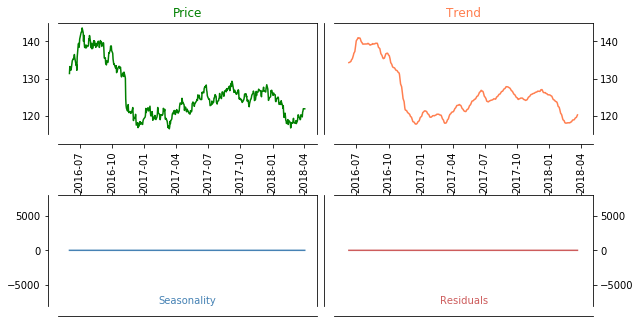

In [17]:
def change_plot(ax): 
    despine(ax) 
    ax.locator_params(axis='y', nbins=5) 
    plt.setp(ax.get_xticklabels(), rotation=90, ha='center') 
 
plt.figure(figsize=(9,4.5)) 
 
plt.subplot(221) 
plt.plot(price, color='Green') 
change_plot(plt.gca()) 
plt.title('Price', color='Green') 
xl = plt.xlim() 
yl = plt.ylim() 
 
plt.subplot(222) 
plt.plot(price.index,price_trend,  
         color='Coral') 
change_plot(plt.gca()) 
plt.title('Trend', color='Coral') 
plt.gca().yaxis.tick_right() 
plt.gca().yaxis.set_label_position("right") 
plt.xlim(xl) 
plt.ylim(yl) 
 
plt.subplot(223) 
plt.plot(price.index,price_seasonal,  
         color='SteelBlue') 
change_plot(plt.gca()) 
plt.gca().xaxis.tick_top() 
plt.gca().xaxis.set_major_formatter(plt.NullFormatter()) 
plt.xlabel('Seasonality', color='SteelBlue', labelpad=-20) 
plt.xlim(xl) 
plt.ylim((-8000,8000)) 
 
plt.subplot(224) 
plt.plot(price.index,price_residual, 
         color='IndianRed') 
change_plot(plt.gca()) 
plt.xlim(xl) 
plt.gca().yaxis.tick_right() 
plt.gca().yaxis.set_label_position("right") 
plt.gca().xaxis.tick_top() 
plt.gca().xaxis.set_major_formatter(plt.NullFormatter()) 
plt.ylim((-8000,8000)) 
plt.xlabel('Residuals', color='IndianRed', labelpad=-20) 
 
plt.tight_layout() 
plt.subplots_adjust(hspace=0.55) 